In [1]:
import pandas as pd
import sqlite3 as sql1
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [3]:
conn1 = sql1.connect('dw_movies.db')

In [5]:
c1 = conn1.cursor()

In [7]:
conn1.commit()

In [9]:
movies_table = pd.read_sql('SELECT * FROM Movies',conn1)
movies_table.head()

,film_id,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count
0,1,The Shawshank Redemption,"Drama, Crime",en,8.7,2,22,1994-09-23,27070
1,2,The Godfather,"Drama, Crime",en,8.7,2,55,1972-03-14,20563
2,3,The Godfather Part II,"Drama, Crime",en,8.6,3,22,1974-12-20,12403
3,4,Schindler's List,"Drama, History, War",en,8.6,3,15,1993-12-15,15810
4,5,12 Angry Men,Drama,en,8.5,1,37,1957-04-10,8611


In [11]:
movies_table.tail()

,film_id,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count
9713,9714,Alone in the Dark,"Action, Fantasy, Horror",en,3.3,1,38,2005-01-28,602
9714,9715,Disaster Movie,Comedy,en,3.2,1,27,2008-08-29,1021
9715,9716,House of the Dead,"Horror, Action, Thriller",en,3.1,1,30,2003-04-11,384
9716,9717,Dragonball Evolution,"Action, Adventure, Fantasy, Science Fiction, T...",en,2.9,1,25,2009-03-12,2028
9717,9718,Birdemic: Shock and Terror,"Romance, Horror, Thriller",en,2.2,1,33,2010-02-27,334


In [13]:
filmDetails_Table = pd.read_sql("SELECT * FROM FilmDetails",conn1)
filmDetails_Table.head()

,film_id,director,top_billed
0,1,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,2,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D..."
2,3,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert..."
3,4,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro..."
4,5,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G...."


In [15]:
filmDetails_Table.tail()

,film_id,director,top_billed
9713,9714,Uwe Boll,"Christian Slater, Tara Reid, Stephen Dorff, Wi..."
9714,9715,Aaron Seltzer,"Matt Lanter, Vanessa Lachey, Gary 'G. Thang' J..."
9715,9716,Uwe Boll,"Jonathan Cherry, Tyron Leitso, Clint Howard, O..."
9716,9717,James Wong,"Justin Chatwin, Chow Yun-fat, Joon Park, Jamie..."
9717,9718,James Nguyen,"Alan Bagh, Whitney Moore, Janae Caster, Colton..."


In [17]:
moreInfo_table = pd.read_sql("SELECT * FROM MoreInfo",conn1)
moreInfo_table.head()

,info_id,runtime,budget,revenue,film_id
0,1,2h 22 min,"$25,000,000","$28,341,469",1
1,2,2h 55 min,"$6,000,000","$245,066,411",2
2,3,3h 22 min,"$13,000,000","$102,600,000",3
3,4,3h 15 min,"$22,000,000","$321,365,567",4
4,5,1h 37 min,"$397,751","$4,360,000",5


In [19]:
moreInfo_table.tail()

,info_id,runtime,budget,revenue,film_id
9713,9714,1h 38 min,"$20,000,000","$12,693,645",9714
9714,9715,1h 27 min,"$25,000,000","$34,816,824",9715
9715,9716,1h 30 min,"$12,000,000","$13,818,181",9716
9716,9717,1h 25 min,"$30,000,000","$58,228,460",9717
9717,9718,1h 33 min,"$10,000",None,9718


In [21]:
# Merge the dataframes on 'film_id'
data_movies = pd.merge(moreInfo_table, filmDetails_Table, on='film_id') 
data_movies = pd.merge(data_movies, movies_table, on='film_id')

In [23]:
#Calculate Total Runtimes
data_movies['total_runtime'] = data_movies['runtime_hour'] * 60 + data_movies['runtime_min']

In [25]:
data_movies = data_movies.drop(columns=['runtime_hour', 'runtime_min'])

In [27]:
data_movies

,info_id,runtime,budget,revenue,film_id,director,top_billed,title,genres,language,user_score,release_date,vote_count,total_runtime
0,1,2h 22 min,"$25,000,000","$28,341,469",1,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",The Shawshank Redemption,"Drama, Crime",en,8.7,1994-09-23,27070,142
1,2,2h 55 min,"$6,000,000","$245,066,411",2,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D...",The Godfather,"Drama, Crime",en,8.7,1972-03-14,20563,175
2,3,3h 22 min,"$13,000,000","$102,600,000",3,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The Godfather Part II,"Drama, Crime",en,8.6,1974-12-20,12403,202
3,4,3h 15 min,"$22,000,000","$321,365,567",4,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",Schindler's List,"Drama, History, War",en,8.6,1993-12-15,15810,195
4,5,1h 37 min,"$397,751","$4,360,000",5,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",12 Angry Men,Drama,en,8.5,1957-04-10,8611,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,9714,1h 38 min,"$20,000,000","$12,693,645",9714,Uwe Boll,"Christian Slater, Tara Reid, Stephen Dorff, Wi...",Alone in the Dark,"Action, Fantasy, Horror",en,3.3,2005-01-28,602,98
9714,9715,1h 27 min,"$25,000,000","$34,816,824",9715,Aaron Seltzer,"Matt Lanter, Vanessa Lachey, Gary 'G. Thang' J...",Disaster Movie,Comedy,en,3.2,2008-08-29,1021,87
9715,9716,1h 30 min,"$12,000,000","$13,818,181",9716,Uwe Boll,"Jonathan Cherry, Tyron Leitso, Clint Howard, O...",House of the Dead,"Horror, Action, Thriller",en,3.1,2003-04-11,384,90
9716,9717,1h 25 min,"$30,000,000","$58,228,460",9717,James Wong,"Justin Chatwin, Chow Yun-fat, Joon Park, Jamie...",Dragonball Evolution,"Action, Adventure, Fantasy, Science Fiction, T...",en,2.9,2009-03-12,2028,85


In [29]:
data_movies.describe()

,info_id,film_id,user_score,vote_count,total_runtime
count,9718.000000,9718.000000,9718.000000,9718.000000,9718.000000
mean,4859.500000,4859.500000,6.633268,1982.468821,105.783803
std,2805.489292,2805.489292,0.783489,3135.105153,22.656835
min,1.000000,1.000000,2.200000,300.000000,2.000000
25%,2430.250000,2430.250000,6.100000,468.000000,94.000000
50%,4859.500000,4859.500000,6.700000,841.500000,104.000000
75%,7288.750000,7288.750000,7.200000,1971.000000,117.000000
max,9718.000000,9718.000000,8.700000,36495.000000,367.000000


In [31]:
data_movies.dtypes

info_id            int64
runtime           object
budget            object
revenue           object
film_id            int64
director          object
top_billed        object
title             object
genres            object
language          object
user_score       float64
release_date      object
vote_count         int64
total_runtime      int64
dtype: object

In [33]:
data_movies['budget'] = data_movies['budget'].replace(r'[\$,]', '', regex=True).astype(float)
data_movies['revenue'] = data_movies['revenue'].replace(r'[\$,]', '', regex=True).astype(float)

In [35]:
categorical_columns = data_movies.select_dtypes(include=['object']).columns
for col in categorical_columns: 
    data_movies[col] = data_movies[col].fillna(data_movies[col].mode()[0])

In [37]:
data_movies[categorical_columns] = data_movies[categorical_columns].apply(lambda x: x.str.lower()) 
data_movies[categorical_columns] = data_movies[categorical_columns].apply(lambda x: x.str.strip())

In [39]:
data_movies['runtime'] = data_movies['runtime'].astype('category')
data_movies['budget'] = data_movies['budget'].astype('category')
data_movies['revenue'] = data_movies['revenue'].astype('category')
data_movies['director'] = data_movies['director'].astype('category')
data_movies['top_billed'] = data_movies['top_billed'].astype('category')
data_movies['title'] = data_movies['title'].astype('category')
data_movies['genres'] = data_movies['genres'].astype('category')
data_movies['language'] = data_movies['language'].astype('category')
data_movies['release_date'] = data_movies['release_date'].astype('category')

In [41]:
data_movies.dtypes

info_id             int64
runtime          category
budget           category
revenue          category
film_id             int64
director         category
top_billed       category
title            category
genres           category
language         category
user_score        float64
release_date     category
vote_count          int64
total_runtime       int64
dtype: object

In [43]:
numerical_cols = ['budget', 'revenue', 'user_score', 'vote_count', 'total_runtime']
scaler = MinMaxScaler()
data_movies_scaled = pd.DataFrame(scaler.fit_transform(data_movies[numerical_cols]),
                           columns = ['MM_budget', 'MM_revenue', 'MM_user_score', 'MM_vote_count', 'MM_total_runtime'])  
data_movies_scaled

,MM_budget,MM_revenue,MM_user_score,MM_vote_count,MM_total_runtime
0,0.054344,0.009692,1.000000,0.739605,0.383562
1,0.013039,0.083819,1.000000,0.559829,0.473973
2,0.028257,0.035091,0.984615,0.334383,0.547945
3,0.047822,0.109916,0.984615,0.428512,0.528767
4,0.000860,0.001490,0.969231,0.229617,0.260274
...,...,...,...,...,...
9713,0.043474,0.004340,0.169231,0.008344,0.263014
9714,0.054344,0.011907,0.153846,0.019920,0.232877
9715,0.026083,0.004725,0.138462,0.002321,0.241096
9716,0.065213,0.019915,0.107692,0.047741,0.227397


In [45]:
normalizer = StandardScaler()
data_movies_normalized = pd.DataFrame(normalizer.fit_transform(data_movies[numerical_cols]), 
                                      columns=['SS_budget', 'SS_revenue', 'SS_user_score', 'SS_vote_count', 'SS_total_runtime'])
data_movies_normalized

,SS_budget,SS_revenue,SS_user_score,SS_vote_count,SS_total_runtime
0,-0.203346,-0.359492,2.637991,8.002546,1.598549
1,-0.640290,0.845033,2.637991,5.926910,3.055138
2,-0.479311,0.053226,2.510351,3.323993,4.246893
3,-0.272337,1.269092,2.510351,4.410775,3.937919
4,-0.769126,-0.492777,2.382710,2.114402,-0.387709
...,...,...,...,...,...
9713,-0.318331,-0.446460,-4.254608,-0.440349,-0.343570
9714,-0.203346,-0.323502,-4.382248,-0.306694,-0.829099
9715,-0.502308,-0.440210,-4.509889,-0.509888,-0.696682
9716,-0.088361,-0.193384,-4.765170,0.014524,-0.917378


In [47]:
md_T = pd.concat([data_movies,data_movies_scaled,data_movies_normalized],axis=1)
md_T

,info_id,runtime,budget,revenue,film_id,director,top_billed,title,genres,language,...,MM_budget,MM_revenue,MM_user_score,MM_vote_count,MM_total_runtime,SS_budget,SS_revenue,SS_user_score,SS_vote_count,SS_total_runtime
0,1,2h 22 min,25000000.0,28341469.0,1,frank darabont,"tim robbins, morgan freeman, bob gunton, willi...",the shawshank redemption,"drama, crime",en,...,0.054344,0.009692,1.000000,0.739605,0.383562,-0.203346,-0.359492,2.637991,8.002546,1.598549
1,2,2h 55 min,6000000.0,245066411.0,2,francis ford coppola,"marlon brando, al pacino, james caan, robert d...",the godfather,"drama, crime",en,...,0.013039,0.083819,1.000000,0.559829,0.473973,-0.640290,0.845033,2.637991,5.926910,3.055138
2,3,3h 22 min,13000000.0,102600000.0,3,francis ford coppola,"al pacino, robert duvall, diane keaton, robert...",the godfather part ii,"drama, crime",en,...,0.028257,0.035091,0.984615,0.334383,0.547945,-0.479311,0.053226,2.510351,3.323993,4.246893
3,4,3h 15 min,22000000.0,321365567.0,4,steven spielberg,"liam neeson, ben kingsley, ralph fiennes, caro...",schindler's list,"drama, history, war",en,...,0.047822,0.109916,0.984615,0.428512,0.528767,-0.272337,1.269092,2.510351,4.410775,3.937919
4,5,1h 37 min,397751.0,4360000.0,5,sidney lumet,"martin balsam, john fiedler, lee j. cobb, e.g....",12 angry men,drama,en,...,0.000860,0.001490,0.969231,0.229617,0.260274,-0.769126,-0.492777,2.382710,2.114402,-0.387709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,9714,1h 38 min,20000000.0,12693645.0,9714,uwe boll,"christian slater, tara reid, stephen dorff, wi...",alone in the dark,"action, fantasy, horror",en,...,0.043474,0.004340,0.169231,0.008344,0.263014,-0.318331,-0.446460,-4.254608,-0.440349,-0.343570
9714,9715,1h 27 min,25000000.0,34816824.0,9715,aaron seltzer,"matt lanter, vanessa lachey, gary 'g. thang' j...",disaster movie,comedy,en,...,0.054344,0.011907,0.153846,0.019920,0.232877,-0.203346,-0.323502,-4.382248,-0.306694,-0.829099
9715,9716,1h 30 min,12000000.0,13818181.0,9716,uwe boll,"jonathan cherry, tyron leitso, clint howard, o...",house of the dead,"horror, action, thriller",en,...,0.026083,0.004725,0.138462,0.002321,0.241096,-0.502308,-0.440210,-4.509889,-0.509888,-0.696682
9716,9717,1h 25 min,30000000.0,58228460.0,9717,james wong,"justin chatwin, chow yun-fat, joon park, jamie...",dragonball evolution,"action, adventure, fantasy, science fiction, t...",en,...,0.065213,0.019915,0.107692,0.047741,0.227397,-0.088361,-0.193384,-4.765170,0.014524,-0.917378


In [49]:
md_T.to_csv("moviesData_transformed", index=False)

In [51]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error

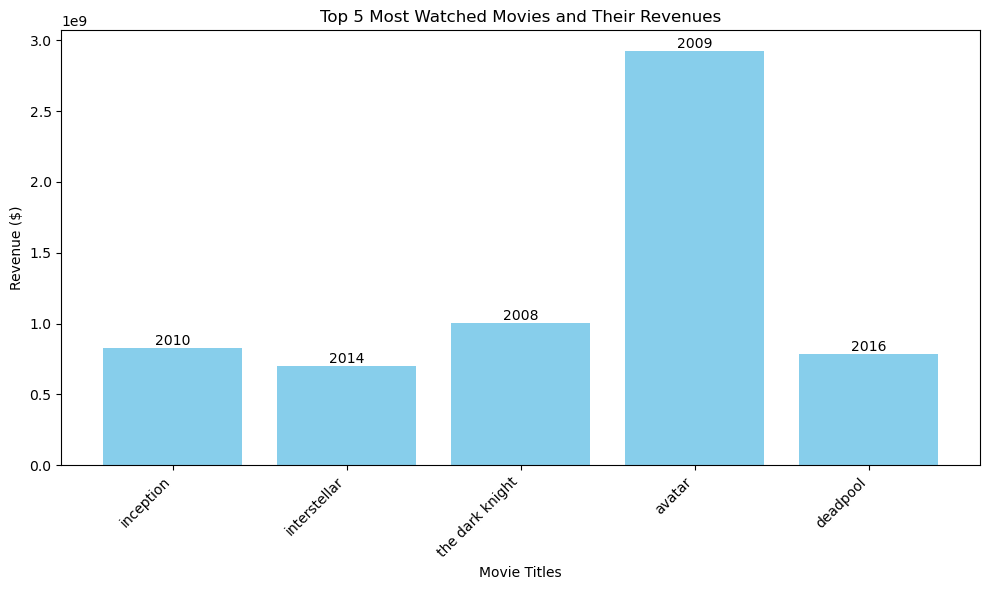

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_movies is already loaded and preprocessed
top5_movies = data_movies.sort_values(by='vote_count', ascending=False).head(5)

# Extract relevant data for visualization
titles = top5_movies['title']
revenues = top5_movies['revenue']
release_years = pd.to_datetime(top5_movies['release_date']).dt.year  # Corrected variable name

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(titles, revenues, color='skyblue')

# Add release year as text above the bars
for bar, year in zip(bars, release_years): 
    height = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{year}', ha='center', va='bottom')

# Formatting the plot
plt.xlabel('Movie Titles') 
plt.ylabel('Revenue ($)') 
plt.title('Top 5 Most Watched Movies and Their Revenues') 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()


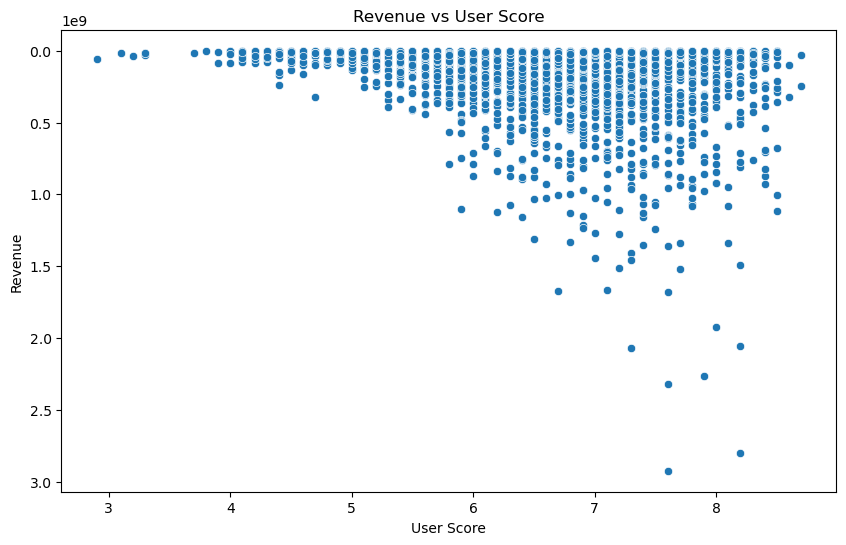

In [55]:
# Revenue vs User SCore
plt.figure(figsize=(10,6))
sns.scatterplot(x='user_score',y='revenue',data=data_movies)
plt.title('Revenue vs User Score')
plt.xlabel('User Score')
plt.ylabel('Revenue')
plt.show()

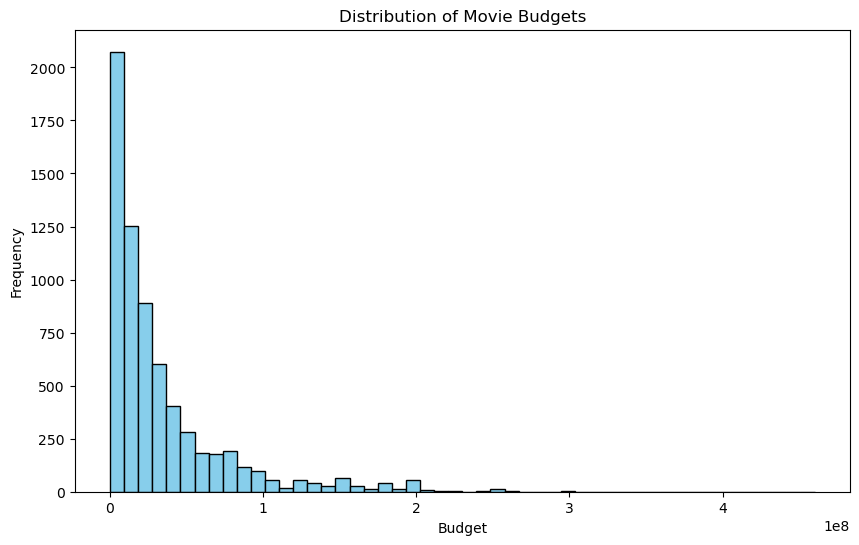

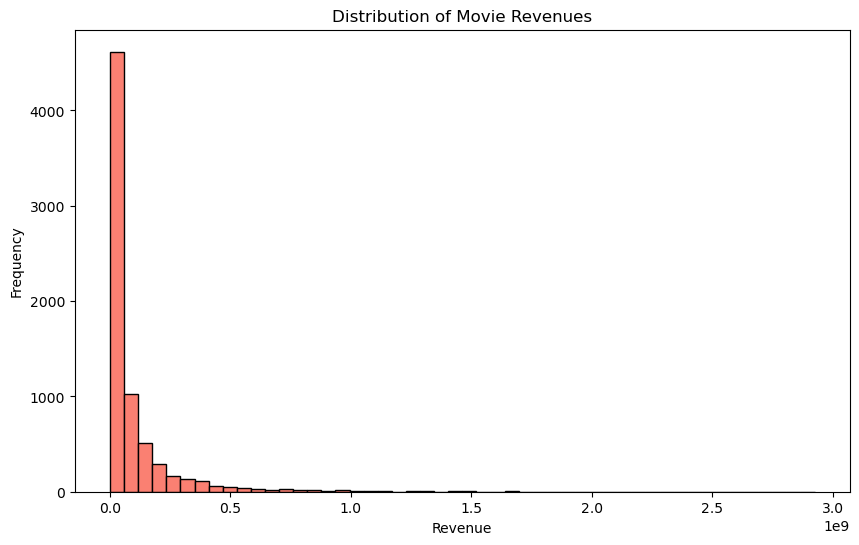

In [59]:
# Distribution of budget
plt.figure(figsize=(10, 6))
plt.hist(data_movies['budget'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

# Distribution of revenue
plt.figure(figsize=(10, 6))
plt.hist(data_movies['revenue'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

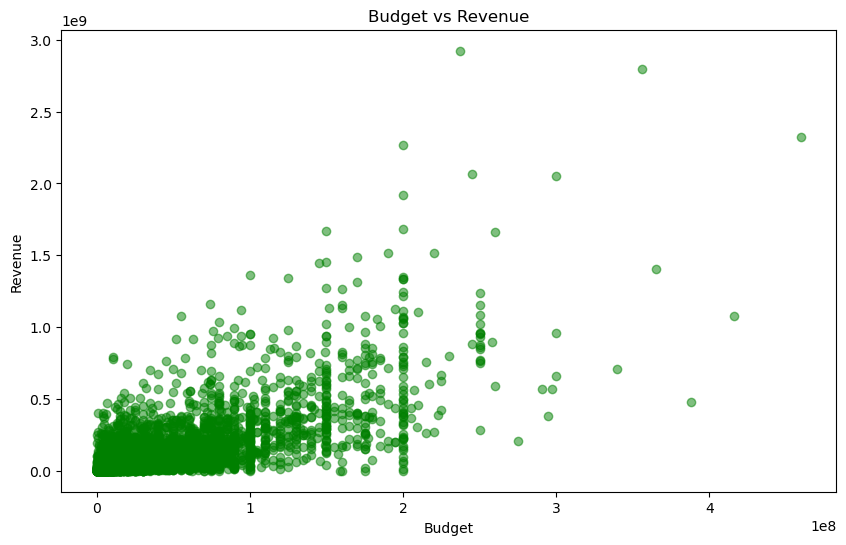

Correlation between budget and revenue: 0.7135785670760695


In [61]:
# Revenue vs User SCore# Scatter plot to explore the correlation between budget and revenue
plt.figure(figsize=(10, 6))
plt.scatter(data_movies['budget'], data_movies['revenue'], alpha=0.5, color='green')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

correlation = data_movies['budget'].corr(data_movies['revenue'])
print(f'Correlation between budget and revenue: {correlation}')

C:\Users\andre\AppData\Local\Temp\ipykernel_9448\3335202189.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_score_by_genre = data_movies.groupby('genres')['user_score'].mean().sort_values(ascending=False).head(10)


genres
animation, drama, war                                   8.5
fantasy, animation, adventure                           8.4
romance, animation                                      8.4
family, animation, drama                                8.3
animation, comedy, romance                              8.3
adventure, fantasy, animation                           8.3
action, adventure, drama, history, romance, thriller    8.3
animation, fantasy, romance, drama                      8.3
animation, thriller                                     8.3
animation, action, fantasy, adventure                   8.2
Name: user_score, dtype: float64


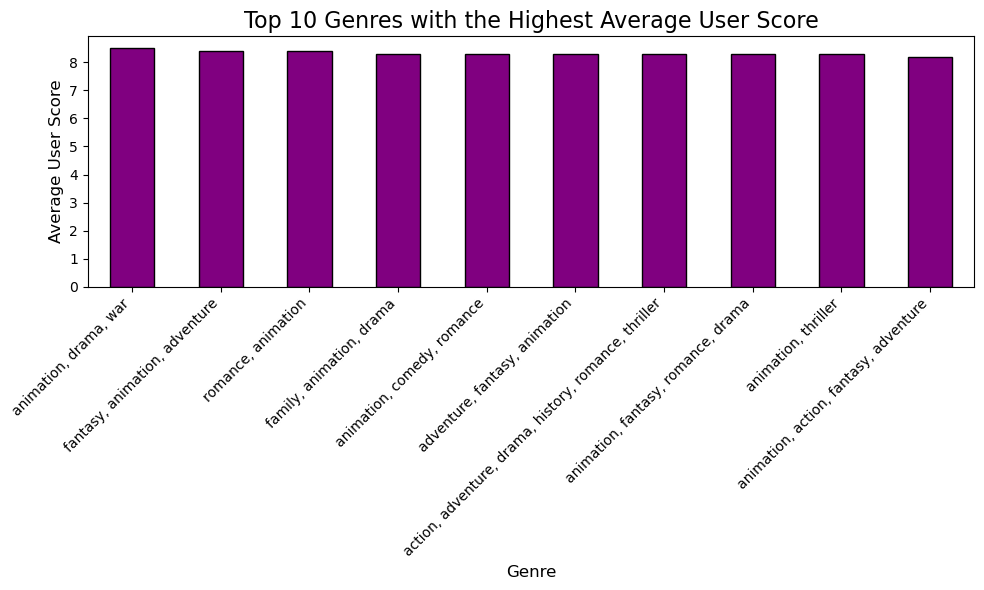

In [93]:
# Calculate average user score by genre
avg_score_by_genre = data_movies.groupby('genres')['user_score'].mean().sort_values(ascending=False).head(10)

print(avg_score_by_genre)

# Plotting the top 10 genres with the highest average user score
plt.figure(figsize=(10, 6))
avg_score_by_genre.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Top 10 Genres with the Highest Average User Score', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average User Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 

# Show the plot
plt.show()

In [67]:
top_revenue_movies = data_movies.sort_values(by='revenue', ascending=False).head(10)
print(top_revenue_movies[['title', 'revenue']])

                             title       revenue
1051                        avatar  2.923706e+09
91               avengers: endgame  2.799439e+09
957       avatar: the way of water  2.320250e+09
420                        titanic  2.264162e+09
2142  star wars: the force awakens  2.068224e+09
93          avengers: infinity war  2.052415e+09
341        spider-man: no way home  1.921847e+09
992                   inside out 2  1.682636e+09
4683                jurassic world  1.671537e+09
2782                 the lion king  1.663000e+09


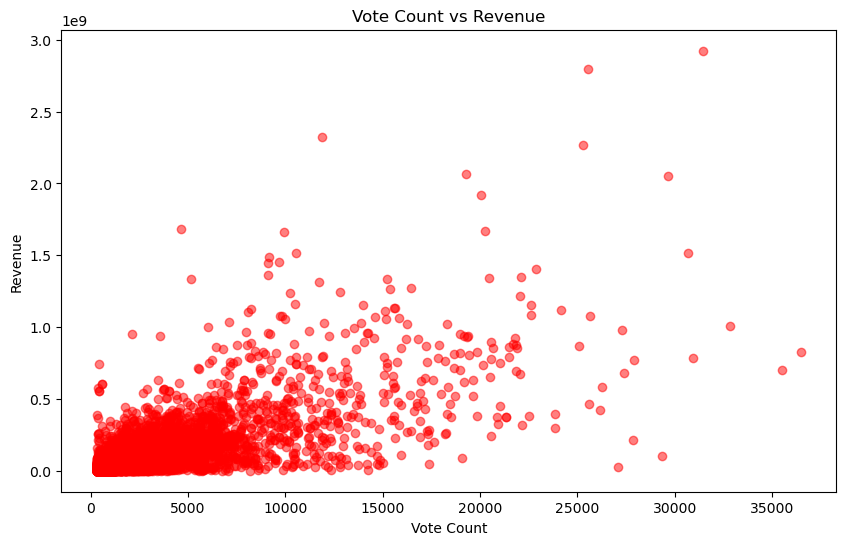

Correlation between vote count and revenue: 0.7259020228406547


In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(data_movies['vote_count'], data_movies['revenue'], alpha=0.5, color='red')
plt.title('Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.show()

correlation_vc_revenue = data_movies['vote_count'].corr(data_movies['revenue'])
print(f'Correlation between vote count and revenue: {correlation_vc_revenue}')


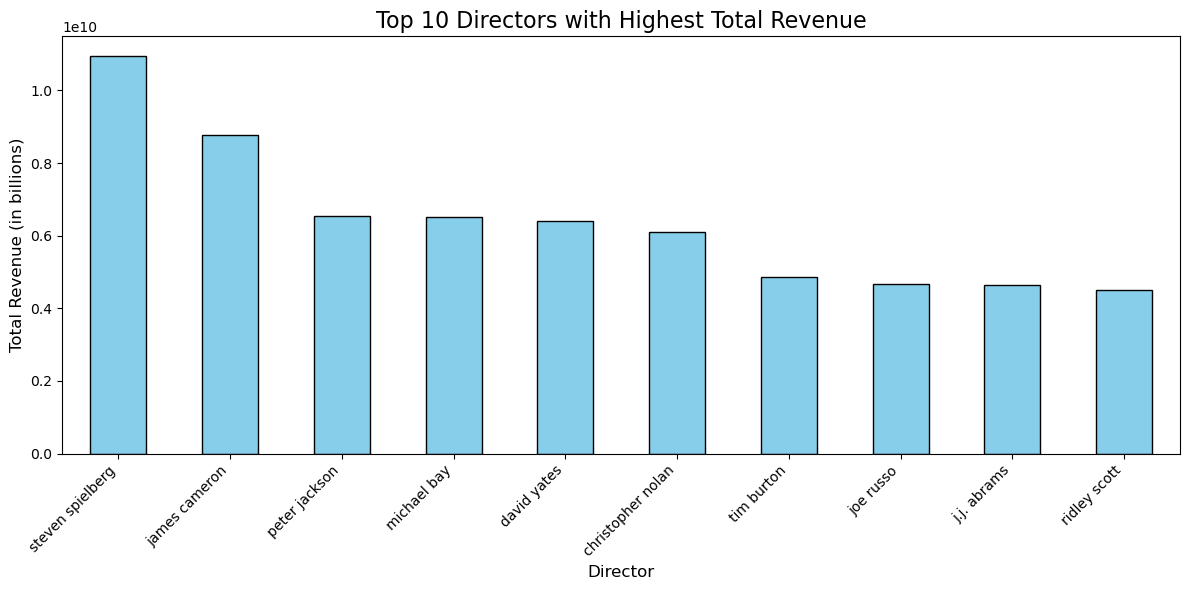

In [91]:
data_movies['revenue'] = pd.to_numeric(data_movies['revenue'], errors='coerce')

data_movies['director'] = data_movies['director'].astype(str)

revenue_by_director = data_movies.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
revenue_by_director.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Directors with Highest Total Revenue', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Total Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Most Paid Actor:
actor
robert downey jr.    1.498281e+10
Name: revenue, dtype: float64


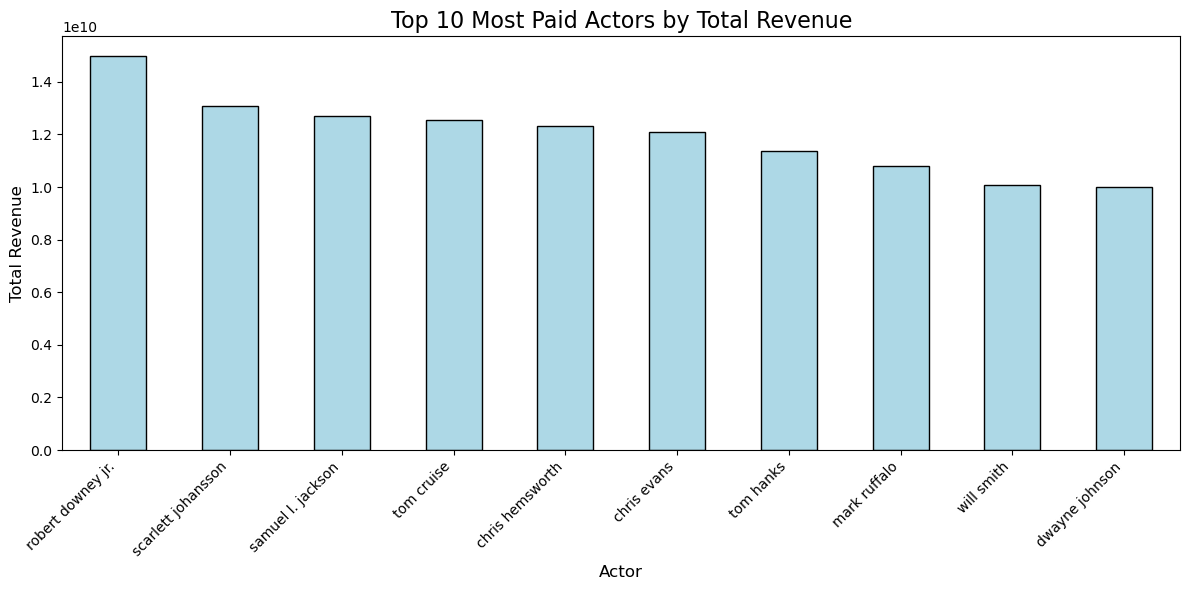

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Split 'top_billed' into individual actors
top_billed_actors = data_movies['top_billed'].str.split(',', expand=True).stack().str.strip()

# Reset index to ensure alignment with 'revenue' column
top_billed_actors = top_billed_actors.reset_index(level=1, drop=True)

# Create a DataFrame with actors and their corresponding movie revenue
actors_revenue_df = pd.DataFrame({'actor': top_billed_actors, 'revenue': data_movies.loc[top_billed_actors.index, 'revenue']})

# Group by actor and sum the revenue
total_revenue_per_actor = actors_revenue_df.groupby('actor')['revenue'].sum().sort_values(ascending=False)

# Print the most paid actor (actor with the highest total revenue)
most_paid_actor = total_revenue_per_actor.head(1)
print("Most Paid Actor:")
print(most_paid_actor)

# Optional: Plot the top 10 actors based on total revenue
plt.figure(figsize=(12, 6))
total_revenue_per_actor.head(10).plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Top 10 Most Paid Actors by Total Revenue', fontsize=16)
plt.xlabel('Actor', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
